# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading Data

In [2]:
df=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: xlabel='Class'>

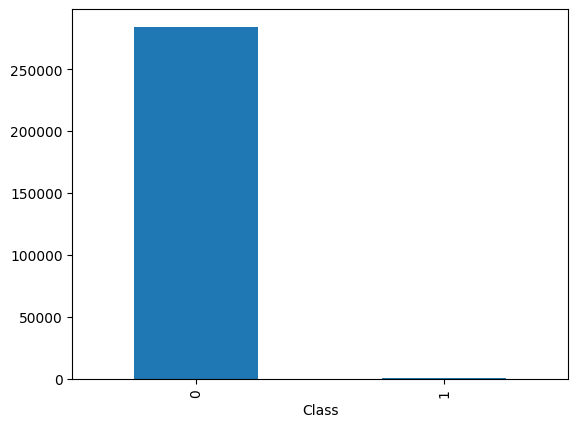

In [7]:
pd.value_counts(df['Class']).plot.bar()

In [8]:
x=df.iloc[:,1:30]
y=df.iloc[:,-1]

In [9]:
x.shape,y.shape

((284807, 29), (284807,))

# Train Test Split

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [11]:
y_train.value_counts()

Class
0    199008
1       356
Name: count, dtype: int64

# Model Building

In [12]:
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [13]:
n_inputs=29

In [14]:
model = Sequential()
model.add(Dense(50, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

# Model Training

In [15]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
6231/6231 [==============================] - 15s 2ms/step - loss: 0.0238
Epoch 2/10
6231/6231 [==============================] - 13s 2ms/step - loss: 0.0124
Epoch 3/10
6231/6231 [==============================] - 14s 2ms/step - loss: 0.0131
Epoch 4/10
6231/6231 [==============================] - 14s 2ms/step - loss: 0.0123
Epoch 5/10
6231/6231 [==============================] - 14s 2ms/step - loss: 0.0087
Epoch 6/10
6231/6231 [==============================] - 13s 2ms/step - loss: 0.0078
Epoch 7/10
6231/6231 [==============================] - 13s 2ms/step - loss: 0.0063
Epoch 8/10
6231/6231 [==============================] - 14s 2ms/step - loss: 0.0070
Epoch 9/10
6231/6231 [==============================] - 14s 2ms/step - loss: 0.0071
Epoch 10/10
6231/6231 [==============================] - 14s 2ms/step - loss: 0.0085


# ROC_AUC

In [16]:
from sklearn.metrics import roc_auc_score
y_pred=model.predict(x_test)

print(roc_auc_score(y_test,y_pred))

2671/2671 [==============================] - 4s 1ms/step
0.963215986688907


# Weighted Neural Networks with Keras

In [17]:
weights={0:1,1:550}

In [18]:
model = Sequential()
model.add(Dense(50, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

# Model Training pt2

In [19]:
model.fit(x_train,y_train,class_weight=weights,epochs=10)

Epoch 1/10
6231/6231 [==============================] - 16s 2ms/step - loss: 3.1118
Epoch 2/10
6231/6231 [==============================] - 15s 2ms/step - loss: 2.4998
Epoch 3/10
6231/6231 [==============================] - 15s 2ms/step - loss: 2.6277
Epoch 4/10
6231/6231 [==============================] - 16s 3ms/step - loss: 2.9031
Epoch 5/10
6231/6231 [==============================] - 15s 2ms/step - loss: 1.7129
Epoch 6/10
6231/6231 [==============================] - 15s 2ms/step - loss: 2.6200
Epoch 7/10
6231/6231 [==============================] - 15s 2ms/step - loss: 2.8496
Epoch 8/10
6231/6231 [==============================] - 15s 2ms/step - loss: 2.8792
Epoch 9/10
6231/6231 [==============================] - 15s 2ms/step - loss: 2.7642
Epoch 10/10
6231/6231 [==============================] - 15s 2ms/step - loss: 2.7071


# Prediction

In [20]:
y_pred_final=model.predict(x_test)


2671/2671 [==============================] - 3s 1ms/step


In [21]:
roc_auc_score(y_test,y_pred_final)

0.9659816034681659